In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg
from random import random
import math
from sympy import * 
from scipy.linalg import null_space
import matplotlib

In [5]:
# function to run the Randomized Kaczmarz algorithm
def RK(A, b, x_d):
    " this function takes as inputs a matrix A, vector b, and point x_d and returns the approximation error, norm(x-x_d), across iterations"

    # generating probabilities of choosing the rows
    probas = []
    frob_norm_A = np.linalg.norm(A, ord='fro')
    for i in range(A.shape[0]):
        probas.append((np.linalg.norm(A[i,:], ord=2)**2)/(frob_norm_A**2))

    
    approx_error = [[] for i in range(int(n_run))]
           
    for r in range(int(n_run)):

        x = x_0
        
        approx_error[r].append(np.linalg.norm(x - x_d))

        for i in range(int(n_iter)):
            row_idx = int(np.random.choice(A.shape[0], 1, p=probas)) # to select rows with specified probability
            if np.linalg.norm(A[row_idx,:])==0:  # avoid zero rows
                continue
            else:
                x = x + (b[row_idx] - np.dot(A[row_idx,:],x))/((np.linalg.norm(A[row_idx,:], ord=2))**2)*A[row_idx,:]
                approx_error[r].append(np.linalg.norm(x - x_d))
                
        print("end run", r)

    return(approx_error)

In [26]:
# Generate data
m = 1000
n = 500
r = 300 # rank
A = np.random.randn(m,r) @ np.random.randn(r,n)  # to generate low rank matrix,  for full rank matrix use directly np.random.randn(m,n) to avoid large condition number and very slow convergence
# A = np.random.randn(m,n)
b = A@np.random.randn(n,)
x_ls = np.linalg.pinv(A)@b # the least squares solution of the system
print('rank(A) = ', np.linalg.matrix_rank(A))

In [27]:
# starting point
x_0 = np.zeros((n,))

In [28]:
# Running the RK algorithm

n_iter = 300000   # number of iterations
n_run = 20        # number of runs of the algorithm

approx_error = RK(A, b, x_ls)

end run 0
end run 1
end run 2
end run 3
end run 4
end run 5
end run 6
end run 7
end run 8
end run 9
end run 10
end run 11
end run 12
end run 13
end run 14
end run 15
end run 16
end run 17
end run 18
end run 19


In [29]:
###### computing the bounds

# compute the smallest singular value
U, s, Vt = np.linalg.svd(A)
s = [x for x in s if x>1e-8]
sigma_min = min(s)

bound1 = []  # bound Theorem 1.1
bound2 = []  # bound Corollary 3.6
Rtld = (np.linalg.norm(A, ord='fro')/sigma_min)**2
for k in range(n_iter):
    bound1.append((1-1/Rtld)**(k/2)*np.linalg.norm(x_0 - x_ls, ord=2))
    bound2.append((1-1/Rtld)**(k)*np.linalg.norm(x_0 - x_ls, ord=2))

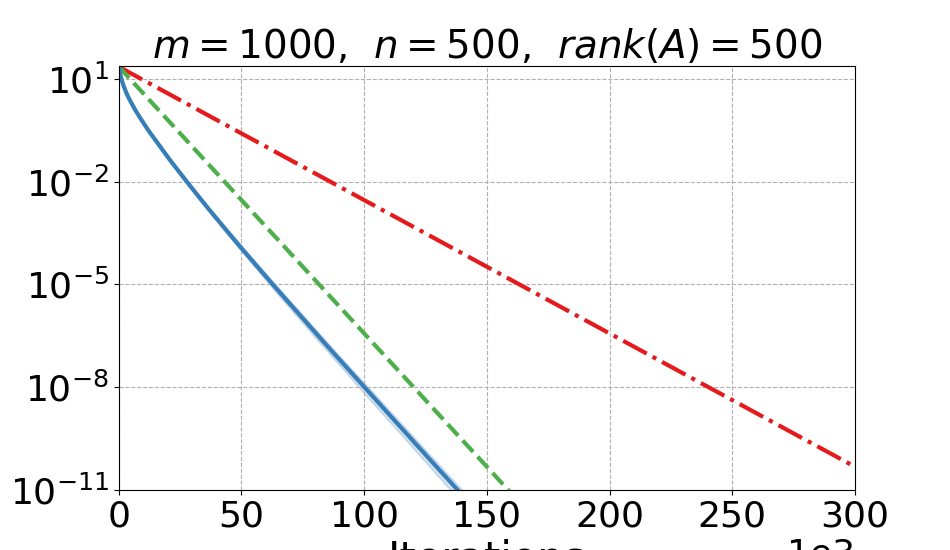

In [31]:
########## plotting
plt.figure(figsize=(9.5, 5.5))

mean =  np.mean(np.array(approx_error), axis = 0)
std = np.std(np.array(approx_error), axis = 0)


plt.plot(bound1, label='Bound Theorem 1.1', color='#e41a1c', linestyle='dashdot', linewidth=3)
plt.plot(bound2, label='Bound Corollary 3.6', color='#4daf4a', linestyle='dashed', linewidth=3)
plt.plot(mean, label="Approximation error ", color='#377eb8', linewidth=3)
plt.fill_between(range(len(mean)), mean-std, mean+std, alpha=0.2, color='#377eb8')


plt.xlabel("Iterations",fontsize = 30)
plt.rcParams['xtick.labelsize']=26
plt.rcParams['ytick.labelsize']=26
plt.title(r'$m=%d$'%(m)+',  '+r'$n=%d$'%(n)+',  '+r'$rank(A)=%d$'%(r), fontsize = 28)
plt.legend(fontsize=26, loc='upper right')
plt.xlim(0,3e5)
plt.ylim(1e-11)
plt.yscale('log')
plt.grid(linestyle = '--')
plt.ticklabel_format(style='sci', axis='x', scilimits=(3,3))